# 1. Linear Regression

$$
\newcommand{\R}{\mathbb{R}}
$$


## Univariate case $f : \mathbb{R} \rightarrow \mathbb{R}$
An example of function linear in the parameters is the following
$$ f(x; \beta) = \beta_1 x + \beta_0, \quad \beta_1, \beta_0\in\R$$

<font color='gray'>_**Warning**: in math function $f(x; \beta)$ is said 'affine', and not 'linear'._</font>

Define in python the function
$$ f(x) = \tfrac{3}{10} x + 2 $$

In [0]:
# define a linear function
def lin_fun(x):
    y = 0.3 * x + 2
    return y



Plot the graph of the function

x = [-1.  -0.6 -0.2  0.2  0.6  1.   1.4  1.8  2.2  2.6  3. ]


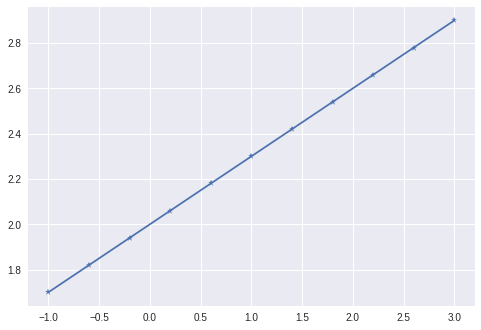

In [179]:
import numpy as np
import matplotlib.pyplot as plt

# create x observations
n = 11 
x = np.linspace(-1, 3, n)
print('x = {}'.format(x))

# plot
plt.plot(x, lin_fun(x), '*-');

### Noise perturbance

Consider a model affected by Gaussian noise: $$ y = f(x) + \varepsilon, \quad\varepsilon\sim \mathcal{N}(0, \sigma^2)$$

Generate $n$ observations: $$\{(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)\}$$

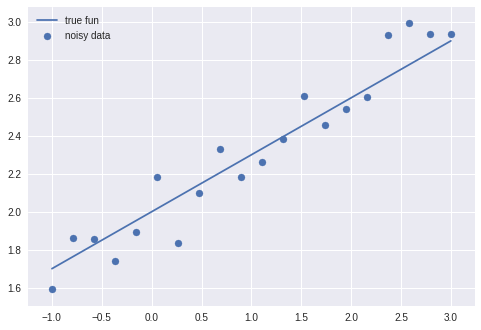

In [180]:
# seed for the pseudo random generator
np.random.seed(123)

n = 20  # number of data points

# regressor
x = np.linspace(-1, 3, n)  
# noise
sigma = 0.1  # std of the noise
eps = np.random.normal(loc=0, scale=sigma, size=n)
# response
y = lin_fun(x) + eps

# plot
plt.plot(x, lin_fun(x), label='true fun');  # original linear function
plt.scatter(x, y, label='noisy data');      # data affected by noise
plt.legend();

## Parameter estimation

Let's try to recover the parameters from the noisy data by solving:
$$
\hat\beta={\rm arg}\min_{\beta} \sum_{i=1}^n \lVert f(x_i;\beta) -y_i\rVert^2.
$$

### Data in compact form
We can express the function $f(x;\beta)$ in the form
$$
f(x;\beta) = \beta_1 x + \beta_0 = \left[x, 1 \right] \left[\begin{array}{c}\beta_1 \\ \beta_0 \end{array} \right] 
$$
so that, arranging the data in matrix form as follows
$$
X = \left[ 
\begin{array}{c}
x_1, 1 \\
x_2 , 1 \\
\vdots \\
x_n, 1
\end{array}
\right] 
\in \mathbb{R}^{n\times 2},
\qquad 
Y = \left[ 
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}
\right] 
\in \mathbb{R}^{n}
$$
we can solve the linear system
$$
X^\top Y = X^\top X \beta 
$$
with respect to $\beta$.

### Estimated parameters $\beta$
When $X^\top X$ is invertible
$$\hat\beta = (X^\top X)^{-1}Y = X^+ Y.$$


X = 
[[-1.          1.        ]
 [-0.78947368  1.        ]
 [-0.57894737  1.        ]
 [-0.36842105  1.        ]
 [-0.15789474  1.        ]]
beta = [0.33780159 1.97364019]


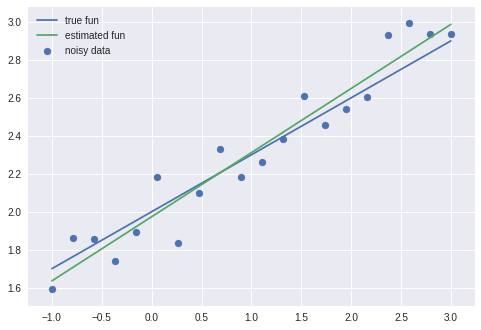

In [181]:
# construct matrix X
ones_vec = np.ones((n, 1))  
x = x.reshape(n, 1)
X = np.concatenate((x, ones_vec), axis=1)
print('X = ')
print(X[:5])

# find beta such that X^T X * beta = X^T y
beta_est = np.linalg.solve(X.T @ X, X.T @ y)
y_est = np.dot(X, beta_est)  
print('beta = {}'.format(beta_est))

# plot
plt.plot(x, lin_fun(x), label='true fun');  # original linear function
plt.scatter(x, y, label='noisy data');      # data affected by noise
plt.plot(x, y_est, label='estimated fun');  # estimate linear function
plt.legend();

### `scikit-learn`: a library for machine learning in Python

The same procedure can be done with `sklearn` module

beta = [0.3378015877778514, 1.9736401854176777]


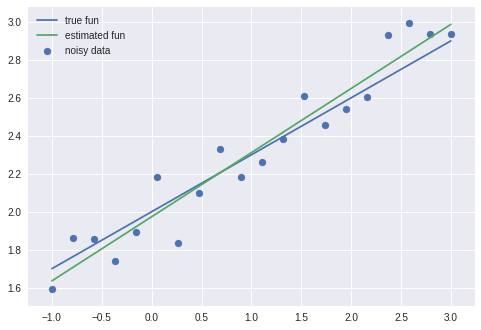

In [182]:
from sklearn.linear_model import LinearRegression

# init the model
lr = LinearRegression()  
# estimate parameters
lr.fit(x, y)
beta_est = [lr.coef_[0], lr.intercept_]
print('beta = {}'.format(beta_est))
# estimated response
y_est = lr.predict(x)

# plot
plt.plot(x, lin_fun(x), label='true fun');  # original linear function
plt.scatter(x, y, label='noisy data');      # data affected by noise
plt.plot(x, y_est, label='estimated fun');  # estimate linear function
plt.legend();

<!-- # Multivariate case
Define a $d$-dimensional linear function $f : \mathbb{R}^d \rightarrow \mathbb{R}$ -->

## Bi-dimensional case $f : \mathbb{R}^2 \rightarrow \mathbb{R}$
$$y = \beta_1 x_1 + \beta_2 x_2 + \beta_0$$  
in a more compact form
$$
y = \left[  x_1, x_2 \right]
\left[
\begin{array}{c}
\beta_1 \\ \beta_2
\end{array}
\right]  + \beta_0
\quad = \vec x^\top \beta + \beta_0
$$

In [0]:
def lin_fun_2(x):
    y = 0.1 * x[:, 0] - 1.3 * x[:, 1] + 1
    return y

def lin_fun_2(x):
    beta = np.array([0.1, -1.3])
    beta0 = 1
    y = np.dot(x, beta) + beta0
    return y

## Generic $d$-dimensional case $f : \mathbb{R}^d \rightarrow \mathbb{R}$
$$y = \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_d x_d + \beta_0 = \vec x^\top \vec \beta + \beta_0$$
in vector form $$ y = \vec x^\top \vec \beta + \beta_0$$


### Data in matrix form
We generate $n$ observations: $\{(\vec x_1,y_1),(\vec x_2,y_2),\dots,(\vec x_n,y_n)\}$
and store them in matrix form:
$$
X = \left[ 
\begin{array}{c}
\vec x_1^\top \\
\vec x_2^\top \\
\vdots \\
\vec x_n^\top
\end{array}
\right] 
\in \mathbb{R}^{n\times d},
\qquad 
Y = \left[ 
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}
\right] 
\in \mathbb{R}^{n}
$$


In [184]:
# a random d-dimensional example
d = 2  
beta = np.random.uniform(-1, 1, d)
beta0 = np.random.uniform(-1, 1)
def lin_fun_d(X):
    return np.dot(X, beta) + beta0

# generate data
n = 100
X = np.random.uniform(-1, 3, size=(n, 2)) 
sigma = 0.1
eps = np.random.normal(loc=0, scale=sigma, size=n)
Y = lin_fun_d(X) + eps
print('size of X = {}'.format(X.shape))
print('size of Y = {}'.format(Y.shape))

size of X = (100, 2)
size of Y = (100,)


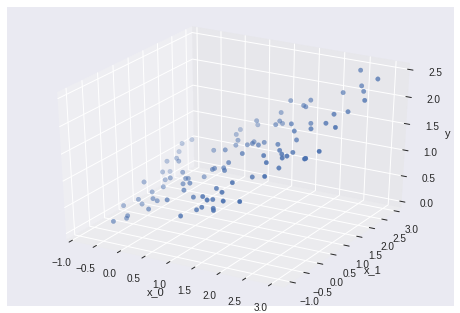

In [185]:
from mpl_toolkits.mplot3d import Axes3D  # this is necessary for 3-d plots 

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d');
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('y')
ax.scatter(X[:, 0], X[:, 1], Y);

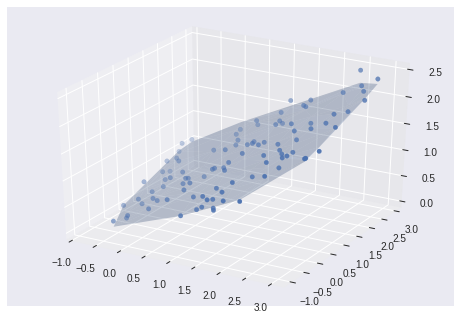

In [186]:
# estimate the parameters
lr = LinearRegression()
lr.fit(X, Y)
Y_est = lr.predict(X)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d');
ax.scatter(X[:, 0], X[:, 1], Y, label='noisy data');
ax.plot_trisurf(X[:, 0], X[:, 1], Y_est, alpha=0.3, label='est fun');


## Dealing with multi-dimensional outputs $f : \mathbb{R}^d \rightarrow \mathbb{R}^m$

$$
\begin{cases}
y_1&= \beta_{11} x_1 + \beta_{21} x_2 + \dots + \beta_{d1} x_d + \beta_{11}
\\
y_2&= \beta_{12} x_1 + \beta_{22} x_2 + \dots + \beta_{d2} x_d + \beta_{11}
\\
&\vdots
\\
y_m&= \beta_{1m} x_1 + \beta_{2m} x_2 + \dots + \beta_{dm} x_d + \beta_{11}
\end{cases}
$$
in matrix form 
$$ \vec y = B\, \vec x + \vec \beta_0$$
<!-- or equivalently
$$ \vec y^\top = \vec x^\top B + \vec \beta_0^\top$$ -->
where
$$
B = \left[ \begin{array}{c}
\beta_{11}, &\beta_{21}, &\dots, &\beta_{d1}\\
\beta_{12}, &\beta_{22}, &\dots, &\beta_{d2}\\
\vdots  & \vdots &\ddots& \vdots
\\
\beta_{1m}, &\beta_{2m}, &\dots, &\beta_{dm}
\end{array}
\right]
\qquad
\beta_0 = \left[ \begin{array}{c}
\beta_{01}\\
\beta_{02}\\
\vdots 
\\
\beta_{0m}
\end{array}
\right]
$$

# 2. Approximate polynomials with linear regression

$$y = \beta_1 x + \beta_2 x^2 + \dots + \beta_d x^d + \beta_0 = \vec x^\top \vec \beta + \beta_0$$

__Remark:__ This is linear in the parameters! In fact, 'linear' in 'linear regression' refers to the parameters.

We consider a regressor vector $[x, x^2,\dots,  x^d]$, up to a degree $d$ that we can decide.


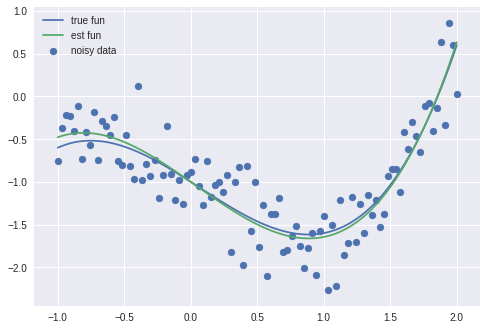

In [257]:
def pol_fun(x):
    return -1 + -x - .1 * x**2 + .5*x**3 #+ .2*x**4 

# generate data
n = 100
X = np.linspace(-1, 2, n).reshape(n,1) 
sigma = 0.3
eps = np.random.normal(loc=0, scale=sigma, size=(n,1))
Y = pol_fun(X) + eps

# create regressor
degree = 3
# Xpol = np.concatenate((X, X**2, X**3), axis=1)
from sklearn.preprocessing import PolynomialFeatures 
pol_feat = PolynomialFeatures(degree=degree, include_bias=False) 
Xpol = pol_feat.fit_transform(X)

# estimate parameter
lr = LinearRegression()
lr.fit(Xpol, Y)
Y_est = lr.predict(Xpol)

# plot results
plt.plot(X, pol_fun(X), label='true fun');
plt.scatter(X, Y, label='noisy data');
plt.plot(X, Y_est, label='est fun');
plt.legend();


### Ridge regression

$$
\hat\beta={\rm arg}\min_{\beta} \sum_{i=1}^n \lVert f(x_i;\beta) -y_i\rVert^2 + \lambda \lVert \beta\rVert^2.
$$

beta = [-1.07985128], [[-2.49617492  1.66159173  7.31978091 -5.86244998 -8.53358284  6.458339
   3.48179945 -2.50763335 -0.42180638  0.30008646]]
beta = [-0.98682062], [[-0.78748805 -0.1171647   0.03010825 -0.12883579  0.14293333  0.05129252
   0.18348314  0.01725368 -0.16573755  0.05309786]]


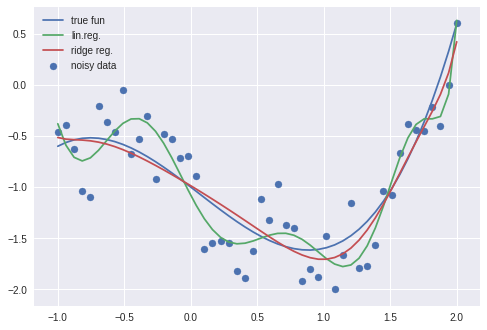

In [267]:
# generate data [200 50 20 10]
n = 50
X = np.linspace(-1, 2, n).reshape(n,1) 
sigma = 0.3
eps = np.random.normal(loc=0, scale=sigma, size=(n,1))
Y = pol_fun(X) + eps

# create regressor
degree = 10
pol_feat = PolynomialFeatures(degree=degree, include_bias=False) 
Xpol = pol_feat.fit_transform(X)

# linear regression
lr = LinearRegression()
lr.fit(Xpol, Y)
Y_est = lr.predict(Xpol)

# ridge regression
from sklearn.linear_model import Ridge 
rid = Ridge()
rid.fit(Xpol, Y)
Y_rid_est = rid.predict(Xpol)

# plot results
plt.plot(X, pol_fun(X), label='true fun')
plt.scatter(X, Y, label='noisy data')
plt.plot(X, Y_est, label='lin.reg.')
plt.plot(X, Y_rid_est, label='ridge reg.')
plt.legend()

# estimated beta
print('beta = {}, {}'.format(lr.intercept_, lr.coef_))
print('beta = {}, {}'.format(rid.intercept_, rid.coef_))